# Quickstart

In this tutorial, the basic capabilities of PyWake are shown. Essentially, how to calculate a wind farm's AEP using the wind farm simulation tool and how to visualize and interpret the results. In addition, the use of flow maps is also shown.

**Install PyWake if needed**

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

#### Import and set up of wind turbines, site, and flow model

There are many sites and wind turbines available in PyWake, some of them include:

- Hornsrev1 offshore wind farm
- Lillgrund offshore wind farm
- IEA Task 37 Site land-based wind farm
- Vestas V80 turbine
- IEA 3.4 MW turbine
- DTU 10MW reference turbine

For detailed information on the sites and wind turbine object features, please see the [Site](./Site.ipynb) and [Wind turbine](./WindTurbines.ipynb) examples.

In [1]:
from py_wake.examples.data.hornsrev1 import Hornsrev1Site, V80, wt_x, wt_y, wt16_x, wt16_y
from py_wake import NOJ

#here we import the turbine, site and wake deficit model to use.
windTurbines = V80()
site = Hornsrev1Site()
noj = NOJ(site,windTurbines)

**Now we run the model using the initial positions of the wind farm**

For more information about the `SimulationResult` object and the paratemers included, please see the [wind farm simulation](./RunWindFarmSimulation.ipynb) example.

In [2]:
simulationResult = noj(wt16_x,wt16_y)

To calculate the AEP, we use the **simulationResult.aep()** command. This will show an xarray with the characteristics of the site, including the number of turbines and the wind speed and wind direction studied. In addition, it will show the AEP of each turbine for each flow case.

In [3]:
simulationResult.aep()

<xarray.DataArray 'AEP [GWh]' (wt: 16, wd: 360, ws: 23)>
array([[[0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        ...,
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.99347385e-05, 1.42930180e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07]],

       [[0.00000000e+00, 3.22981375e-05, 1.07981910e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.51397497e-05, 1.13612781e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.82191783e-05, 1.19714904e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
...
        [0.00000000e+00, 3.71777590e-05, 9.99666402e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.71648787e-05, 9.98936103e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.74309185e-05, 1.00800249e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07]],

       [[0.00000000e+00, 3.71340563e-05, 1.05620267e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.88954661e-05, 1.12693592e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 4.08454658e-05, 1.19479314e-04, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        ...,
        [0.00000000e+00, 3.56657883e-05, 9.90388284e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.56485529e-05, 9.89644383e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07],
        [0.00000000e+00, 3.57746501e-05, 9.96806080e-05, ...,
         2.47780973e-06, 1.00529802e-06, 3.84203469e-07]]])
Coordinates:
  * wt       (wt) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * wd       (wd) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * ws       (ws) int32 3 4 5 6 7 8 9 10 11 12 ... 16 17 18 19 20 21 22 23 24 25
    x        (wt) float64 4.24e+05 4.24e+05 4.241e+05 ... 4.258e+05 4.259e+05
    y        (wt) float64 6.151e+06 6.151e+06 6.15e+06 ... 6.15e+06 6.15e+06
    h        (wt) float64 70.0 70.0 70.0 70.0 70.0 ... 70.0 70.0 70.0 70.0 70.0
    type     (wt) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    Description:  Annual energy production [GWh]

To obtain the total AEP, we use the **.sum()** command.

In [4]:
print ("Total AEP: %f GWh"%simulationResult.aep().sum())

Total AEP: 143.151568 GWh


#### Plot AEP as function of wind turbines, wind direction and wind speed

There is also the possibility of plotting the individual AEP for each turbine for the flow cases studied. In addition, the AEP can be plotted against either the wind speed or wind direction.

Text(0.5, 1.0, 'AEP vs wind direction')

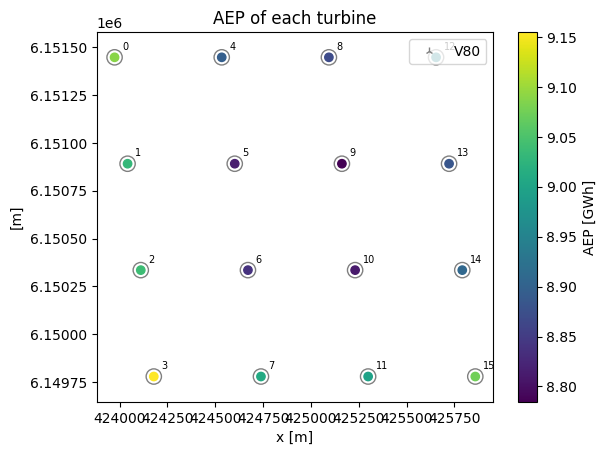

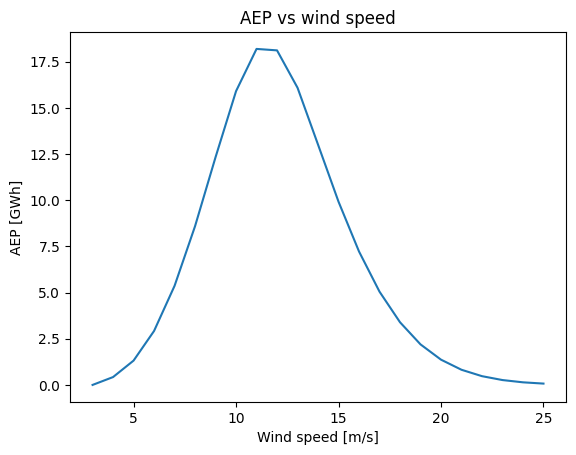

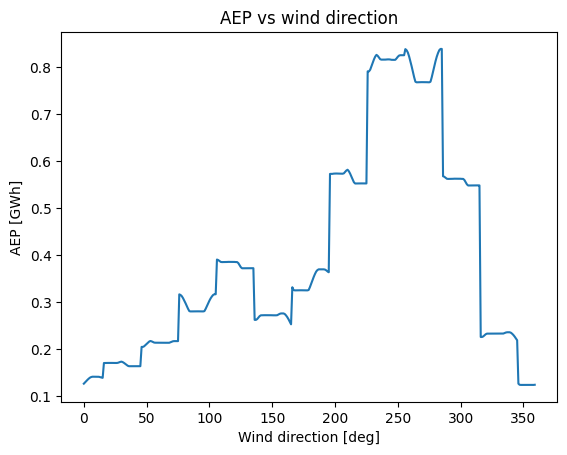

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure()
aep = simulationResult.aep() 
windTurbines.plot(wt16_x,wt16_y)
c =plt.scatter(wt16_x, wt16_y, c=aep.sum(['wd','ws']))
plt.colorbar(c, label='AEP [GWh]')
plt.title('AEP of each turbine')
plt.xlabel('x [m]')
plt.ylabel('[m]')

plt.figure()
aep.sum(['wt','wd']).plot()
plt.xlabel("Wind speed [m/s]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind speed')

plt.figure()
aep.sum(['wt','ws']).plot()
plt.xlabel("Wind direction [deg]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind direction')

#### Plot flow maps

It is also possible to plot the wind farm wake map. This shows the wake behavior for each turbine given the flow cases studied.

You can change the values of the wind speed and wind direction to visualize the wake maps for different flow cases.

Text(0.5, 1.0, 'Wake map for 10 m/s and 270 deg')

<Figure size 640x480 with 0 Axes>

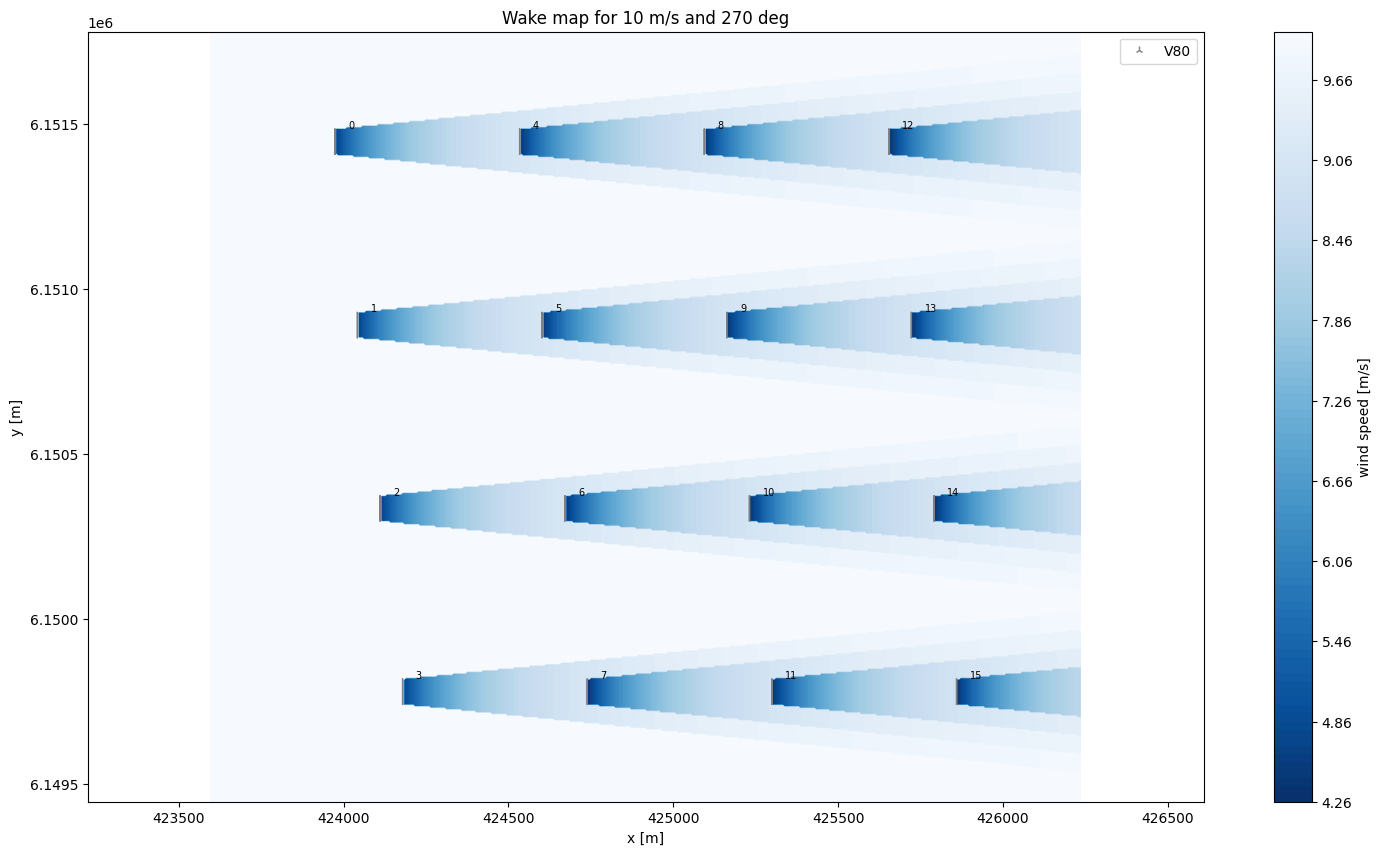

In [6]:
wind_speed = 10
wind_direction = 270

plt.figure()
flow_map = simulationResult.flow_map(ws=wind_speed, wd=wind_direction)
plt.figure(figsize=(18,10))
flow_map.plot_wake_map()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Wake map for' + f' {wind_speed} m/s and {wind_direction} deg')